In [230]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import os
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
%matplotlib inline

In [231]:
data=pd.read_csv("NSE_stock.csv")

In [232]:
data

,date,open,high,low,close,Shares Traded,Turnover (₹ Cr)
0,19-Sep-22,17540.65,17667.20,17429.70,17622.25,258329581.0,19548.99
1,20-Sep-22,17770.40,17919.30,17744.40,17816.25,263100874.0,20456.69
2,21-Sep-22,17766.35,17838.70,17663.60,17718.35,245532498.0,19816.78
3,22-Sep-22,17609.65,17722.75,17532.45,17629.80,284094023.0,21303.96
4,23-Sep-22,17593.85,17642.15,17291.65,17327.35,390754862.0,23750.53
...,...,...,...,...,...,...,...
243,11-Sep-23,19890.00,20008.15,19865.35,19996.35,248763130.0,21924.34
244,12-Sep-23,20110.15,20110.35,19914.65,19993.20,328064239.0,30110.80
245,13-Sep-23,19989.50,20096.90,19944.10,20070.00,251394599.0,24332.36
246,14-Sep-23,20127.95,20167.65,20043.45,20103.10,275111881.0,21902.65


In [233]:
data.columns

Index(['date', 'open', 'high', 'low', 'close', 'Shares Traded',
       'Turnover (₹ Cr)'],
      dtype='object')

In [234]:
data.reset_index(inplace=True)
print

<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [235]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 248 entries, 0 to 247
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            248 non-null    int64  
 1   date             248 non-null    object 
 2   open             248 non-null    float64
 3   high             248 non-null    float64
 4   low              248 non-null    float64
 5   close            248 non-null    float64
 6   Shares Traded    247 non-null    float64
 7   Turnover (₹ Cr)  247 non-null    float64
dtypes: float64(6), int64(1), object(1)
memory usage: 15.6+ KB


In [236]:
data.describe()

,index,open,high,low,close,Shares Traded,Turnover (₹ Cr)
count,248.000000,248.000000,248.000000,248.000000,248.000000,2.470000e+02,247.000000
mean,123.500000,18320.362298,18386.192742,18225.560282,18308.931855,2.664928e+08,22528.858016
std,71.735626,816.339414,809.199960,828.790483,824.749185,7.286277e+07,6325.796508
min,0.000000,16798.050000,17026.050000,16747.700000,16818.100000,4.502948e+07,3772.490000
25%,61.750000,17756.137500,17795.937500,17611.925000,17716.625000,2.248169e+08,19085.615000
50%,123.500000,18193.625000,18262.075000,18093.400000,18186.375000,2.526979e+08,21660.690000
75%,185.250000,18752.362500,18831.862500,18695.125000,18761.575000,2.849294e+08,24538.500000
max,247.000000,20156.450000,20222.450000,20129.700000,20192.350000,6.964958e+08,70755.080000


# Finding Null Values

In [237]:
data.isnull().sum()

index              0
date               0
open               0
high               0
low                0
close              0
Shares Traded      1
Turnover (₹ Cr)    1
dtype: int64

In [238]:
data = data.dropna()
print(data.to_string())

     index       date      open      high       low     close  Shares Traded  Turnover (₹ Cr)
0        0  19-Sep-22  17540.65  17667.20  17429.70  17622.25    258329581.0         19548.99
1        1  20-Sep-22  17770.40  17919.30  17744.40  17816.25    263100874.0         20456.69
2        2  21-Sep-22  17766.35  17838.70  17663.60  17718.35    245532498.0         19816.78
3        3  22-Sep-22  17609.65  17722.75  17532.45  17629.80    284094023.0         21303.96
4        4  23-Sep-22  17593.85  17642.15  17291.65  17327.35    390754862.0         23750.53
5        5  26-Sep-22  17156.30  17196.40  16978.30  17016.30    492002942.0         27533.01
6        6  27-Sep-22  17110.90  17176.45  16942.35  17007.40    359895458.0         22712.80
7        7  28-Sep-22  16870.55  17037.60  16820.40  16858.60    323922457.0         21400.93
8        8  29-Sep-22  16993.60  17026.05  16788.60  16818.10    340034380.0         24758.63
9        9  30-Sep-22  16798.05  17187.10  16747.70  17094.3

In [239]:
data.isnull().sum()

index              0
date               0
open               0
high               0
low                0
close              0
Shares Traded      0
Turnover (₹ Cr)    0
dtype: int64

In [240]:
data.shape

(247, 8)

In [241]:
Date=pd.date_range(start='19/9/2022',end= '15/9/2023',freq='M')

C:\Users\admin\AppData\Local\Temp\ipykernel_11204\1885625628.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  Date=pd.date_range(start='19/9/2022',end= '15/9/2023',freq='M')


In [242]:
Date

DatetimeIndex(['2022-09-30', '2022-10-31', '2022-11-30', '2022-12-31',
               '2023-01-31', '2023-02-28', '2023-03-31', '2023-04-30',
               '2023-05-31', '2023-06-30', '2023-07-31', '2023-08-31'],
              dtype='datetime64[ns]', freq='M')

In [243]:
data.columns

Index(['index', 'date', 'open', 'high', 'low', 'close', 'Shares Traded',
       'Turnover (₹ Cr)'],
      dtype='object')

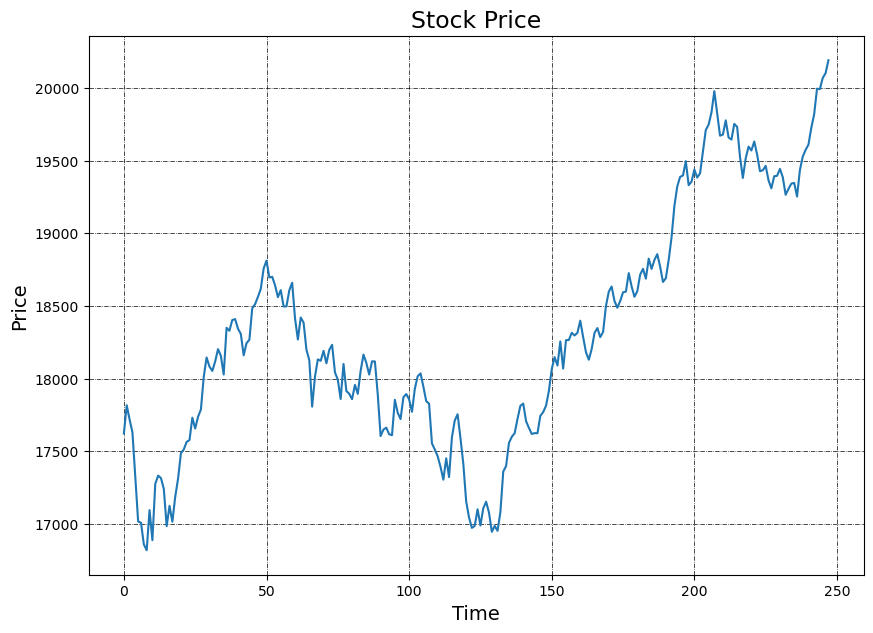

In [259]:
data['close'].plot(figsize=(10, 7))
plt.title("Stock Price", fontsize=17)
plt.ylabel('Price', fontsize=14)
plt.xlabel('Time', fontsize=14)
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()

In [245]:
data = data.drop(columns='date')

In [246]:
def create_train_test_set(data):
    
    features = data.drop(columns=['close'], axis=1)
    target = data['close']
    

    data_len = data.shape[0]
    print('Historical Stock Data length is - ', str(data_len))

    #create a chronological split for train and testing
    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    # Splitting features and target into train, validation and test samples 
    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]

    #print shape of samples
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [247]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(data)

Historical Stock Data length is -  247
Training Set length -  217
Validation Set length -  24
Test Set length -  4
(217, 6) (24, 6) (6, 6)
(217,) (24,) (6,)


In [248]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression()

In [249]:
print('LR Coefficients: \n', lr.coef_)

LR Coefficients: 
 [ 3.97400092e-02 -6.66688641e-01  8.27737838e-01  8.39205800e-01
  5.44557965e-08  3.79018623e-05]


In [250]:
print('LR Intercept: \n', lr.intercept_)

LR Intercept: 
 -10.963247845993465


In [251]:
print("Performance (R^2): ", lr.score(X_train, Y_train))

Performance (R^2):  0.9969981310450405


In [252]:
def get_mape(y_true, y_pred): 
    """
    Compute mean absolute percentage error (MAPE)
    """
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [253]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)


In [254]:
from sklearn.metrics import accuracy_score
print('Training Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),2))

print(' ')

print('Validation Mean Squared Error:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 2)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),2))

print(' ')


print('Test Mean Squared Error:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 2)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),2))


Training Mean Squared Error: 1511.17
Training RMSE:  38.87
 
Validation Mean Squared Error: 1511.17
Validation RMSE:  34.13
 
Test Mean Squared Error: 281.21
Test RMSE:  16.77


In [255]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
#df_pred = df_pred.reset_index()
df_pred

,Actual,Predicted
218,19517.00,19522.655111
219,19597.30,19584.605735
220,19570.85,19572.113536
221,19632.55,19558.809939
222,19543.10,19549.026776
223,19428.30,19455.039571
224,19434.55,19362.983230
225,19465.00,19435.757095
226,19365.25,19373.954568
227,19310.15,19338.880678


<Axes: >

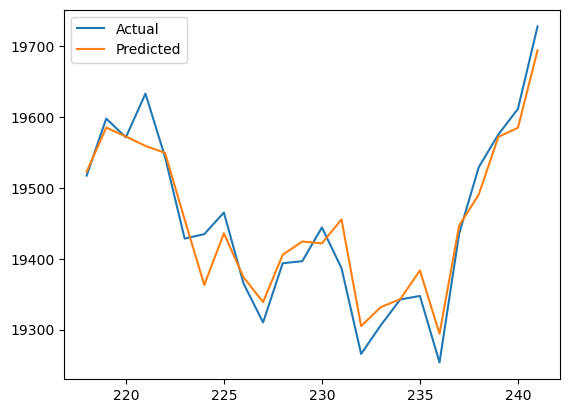

In [256]:
df_pred[['Actual', 'Predicted']].plot()